In [2]:
# from google.colab import drive
from datetime import datetime
import numpy as np
import warnings

# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

import pandas as pd
import matplotlib.pyplot as plt
import math
import mplfinance as mpf

In [3]:
# Load data
path = 'data/dji_2009-2019.csv'
df = pd.read_csv(path, index_col=0)
# Get training data (timely ordered since data is time-series)
n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

Close=df['Close'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:] 

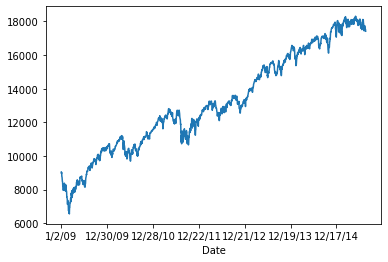

In [4]:
# visual training data
df_train['Close'].plot()
plt.show()

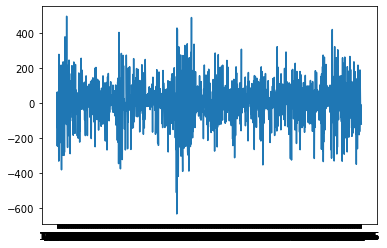

In [5]:
plt.plot(df_train['Close'].diff())

<function matplotlib.pyplot.show(close=None, block=None)>

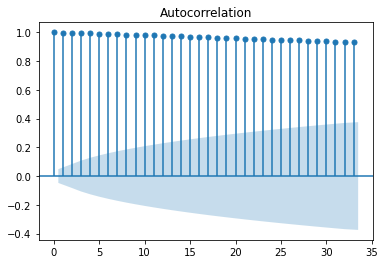

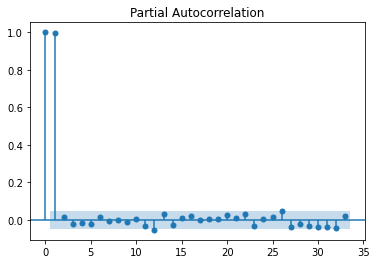

In [6]:
plot_acf(df_train['Close'])
plot_pacf(df_train['Close'])
plt.show

**ARIMA MODEL**

In [9]:
# Load data
path = 'dji_2018-2019.csv'
df = pd.read_csv(path, index_col=0)
# Get training data (timely ordered since data is time-series)
n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

Close=df['Close'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:] 

In [10]:
history=[x for x in train_close]
preds=[]
for i in range(len(test_close)):
    model = ARIMA(history, order=(3, 1, 5))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    preds.append(pred)
    history.append(test_close[i])

/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/

/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/HPhuc/miniconda3/lib/python3.8/site-packages/statsmodels/

In [12]:
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test_close, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 195.532


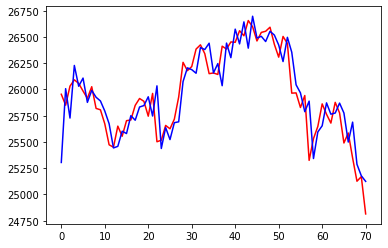

In [13]:
plt.plot(test_close, color='red')
plt.plot(preds, color='blue')
